**Introduction**:

      This project predicts whether a patient has diabetes using machine learning.Dataset used is from Kaggle (Pima Indians Diabetes Dataset).

In [15]:
%pip install pandas

import pandas as pd # type: ignore

# Load dataset
df = pd.read_csv('diabetes.csv')

# Basic info
print(df.shape)
print(df.head())
print(df.info())


Note: you may need to restart the kernel to use updated packages.
(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnanci

**EDA Section**: #Exploratory Data Analysis
 
        In this section, we explore the structure and distribution of data, including class balance and zero-value checks.

In [16]:
#for descriptive stattistics
print(df.describe())
#for checking null values
print(df.isnull().sum())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [17]:
#for class distribution
print(df['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


**Cleaning**:
        
        We replaced 0s in certain columns with the mean values since 0 is not a valid reading for things like Glucose or BMI.

In [18]:
#for columns with 0 means missing values
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zero:
    print(f"{col} has {(df[col] == 0).sum()} zeroes")
    df[col].replace(0, df[col].mean(), inplace=True)


Glucose has 5 zeroes
BloodPressure has 35 zeroes
SkinThickness has 227 zeroes
Insulin has 374 zeroes
BMI has 11 zeroes


C:\Users\DANISH LAPTOP\AppData\Local\Temp\ipykernel_11716\976268293.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, df[col].mean(), inplace=True)


**Modeling**:

        We trained a logistic regression model to predict the diabetes outcome with an accuracy of 76.62%

In [19]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {Accuracy * 100:.2f}%")




Note: you may need to restart the kernel to use updated packages.
Logistic Regression Accuracy: 76.62%


**Confusion Matrix**:
        
        The confusion matrix helps us visualize how well the model is classifying diabetic vs. non-diabetic.

Note: you may need to restart the kernel to use updated packages.


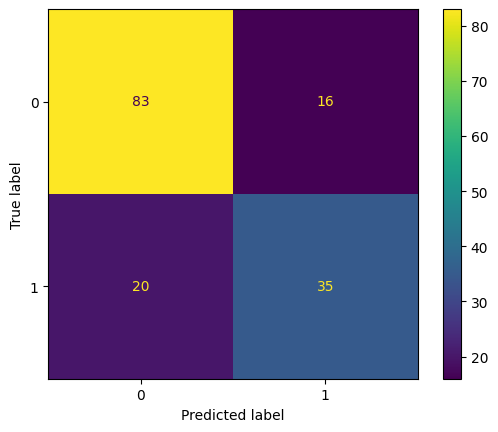

In [20]:
%pip install matplotlib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


rf_preds = rf_model.predict(X_test)


Note: you may need to restart the kernel to use updated packages.
Random Forest Accuracy (Tuned): 74.68%
Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



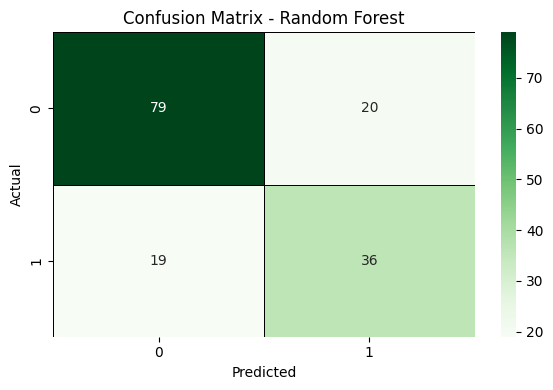

In [25]:
%pip install seaborn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print(f"Random Forest Accuracy (Tuned): {accuracy_score(y_test, rf_preds) * 100:.2f}%")

print("Classification Report:\n")
print(classification_report(y_test, rf_preds))


cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


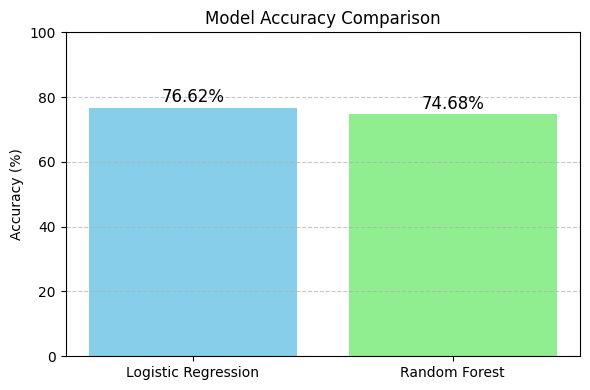

In [26]:
import matplotlib.pyplot as plt


models = ['Logistic Regression', 'Random Forest']
accuracies = [76.62, 74.68]  


plt.figure(figsize=(6,4))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12)

plt.ylim(0, 100)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Final Conclusion

This project aimed to predict the likelihood of diabetes using machine learning models on the Pima Indian Diabetes dataset.

Two classification models were implemented:
- **Logistic Regression**: Accuracy = 76.62%
- **Random Forest**: Accuracy = 74.68%

Interestingly, Logistic Regression performed slightly better than Random Forest. This shows that simpler, linear models can sometimes outperform more complex ones depending on the nature of the data.

---

### Interpretation: Who is likely to have diabetes?

Based on the model's learning and data patterns, individuals with the following characteristics were more likely to be predicted as diabetic (`Outcome = 1`):

- **High glucose levels** (typically > 140 mg/dL)
- **BMI greater than 30** (indicative of obesity)
- **Age over 40**
- **Elevated blood pressure**
- **Low insulin levels**

These features align with known medical indicators of diabetes, which supports the reliability and interpretability of the model.

---

### Key Takeaway

Machine learning models, even simple ones, can effectively detect high-risk individuals using clinical data. Such models can be used as early warning systems in healthcare to prompt further diagnosis or intervention.

### Author & Original Work

This project was developed and implemented by **Azib Malick** as part of a practical machine learning learning journey focused on healthcare data.  
Please do not copy or redistribute without permission.

For contact or collaboration: **azibmalick@gmail.com**

© 2025 Azib Malick. All rights reserved.

